<a href="https://colab.research.google.com/github/joaochenriques/IST---Marine-Currents-and-Tidal-Energy/blob/main/Tidal_Stream/BladeElementMethod/BladeDesign_V06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import subprocess
import pandas as pd
import pathlib
import numpy as np
from scipy.optimize import minimize, root_scalar

def cmdcall( cmd, verbose = False ):
    output = subprocess.getoutput( cmd )
    if verbose: print(output)

if not pathlib.Path("mpl_utils.py").exists():
  cmdcall( "curl -O https://raw.githubusercontent.com/joaochenriques/ipynb_libs/main/mpl_utils.py" )

import matplotlib.pyplot as mpl
import mpl_utils as mut
mut.config_plots()

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

In [114]:
rad2deg = 180/np.pi
deg2rad = np.pi/180

λ_hub = 0.3
λ_tip = 7.0
dλ = 0.1
n = int( ( λ_tip - λ_hub ) / dλ ) + 1
λ_vec = np.linspace( λ_hub, λ_tip, n )

a_vec = np.zeros_like( λ_vec )
ap_vec = np.zeros_like( λ_vec )
ϕ_vec = np.zeros_like( λ_vec )
Zc_vec = np.zeros_like( λ_vec )
CP_vec = np.zeros_like( λ_vec )
CP = 0.0
λ_vec

array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. ])

## Glauert optimal distribution

C_P = 0.5791


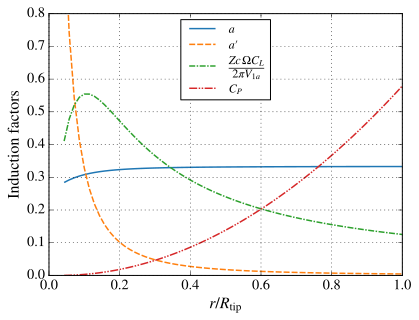

In [115]:
def f(y):
    return -64/5 * y**5 - 72 * y**4 - 124 * y**3 - 38 * y**2 + 63 * y + 12 * np.log(y) + 4 / y

def Integral_f( y2, y1, λ_tip ):
    return 8 / ( 729 * λ_tip**2 ) * ( f(y2) - f(y1) )

for i, λ in enumerate( λ_vec ):

    func = lambda a: 16 * a**3 - 24 * a**2 + 3 * ( 3 - λ**2 ) * a + ( λ**2 - 1 )
    a = root_scalar(func, bracket=[ 1.0/4.0, 1.0/3.0 ], method='brentq' ).root
    ap = ( 1.0 - 3 * a ) / ( 4 * a - 1 )

    ϕ = np.arctan( ( 1 - a ) / ( 1 + ap ) / λ )
    Zc  = 4.0 * ap * λ**2 / np.sqrt( ( 1.0 - a )**2 + ( 1.0 + ap )**2 * λ**2 )

    a_vec[i] = a
    ap_vec[i] = ap
    ϕ_vec[i] = ϕ
    Zc_vec[i] = Zc

    if i > 0:
        CP_vec[i] = CP = CP + Integral_f( 1 - 3*a_vec[i], 1 - 3*a_vec[i-1], λ_tip )
    else:
        CP = 0.0

x_vec = λ_vec / λ_tip

mpl.plot( x_vec, a_vec,  label = r"$a$" )
mpl.plot( x_vec, ap_vec, label = r"$a\prime$" )
mpl.plot( x_vec, Zc_vec, label = r"$\dfrac{Zc\,\Omega C_L}{2\pi V_{1a}}$" )
mpl.plot( x_vec, CP_vec, label = r"$C_P$" )

mpl.xlabel( r"$r/R_\mathrm{tip}$")
mpl.ylabel( "Induction factors")
mpl.legend( loc="upper center", fontsize=12, handlelength=2.8, \
            labelspacing=0.4 )
mpl.grid()
mpl.ylim( ( 0.0, 0.8 ) )
mpl.savefig( "InductionFactors.pdf" )
print( f"C_P = {CP_vec[-1]:.4f}" )

In [116]:
df = pd.DataFrame( { r"$\lambda$": λ_vec,
                     r"$a$": a_vec,
                     r"$a'$": ap_vec,
                     r"$\phi$": ϕ_vec*rad2deg,
                     r"$C_P$": CP_vec,
                     r"$\frac{Zc\,\Omega C_L}{2\pi V_{1a}}$": Zc_vec
                    } )

# print( df.to_latex(index=False,
#        formatters=["{:.2f}".format,"{:.5f}".format,"{:.5f}".format, \
#                    "{:.2f}".format,"{:.3f}".format,"{:.4f}".format]
# ))
df

,$\lambda$,$a$,$a'$,$\phi$,$C_P$,"$\frac{Zc\,\Omega C_L}{2\pi V_{1a}}$"
0,0.3,0.284075,1.084214,48.867171,0.000000,0.410632
1,0.4,0.291898,0.741707,45.465727,0.000443,0.477863
2,0.5,0.298346,0.542757,42.289966,0.001105,0.520502
3,0.6,0.303645,0.415066,39.357496,0.002002,0.544310
4,0.7,0.307998,0.327629,36.671987,0.003146,0.554210
...,...,...,...,...,...,...
63,6.6,0.332774,0.005072,5.743765,0.513630,0.132543
64,6.7,0.332790,0.004922,5.659296,0.529635,0.130626
65,6.8,0.332806,0.004779,5.577257,0.545883,0.128763
66,6.9,0.332821,0.004642,5.497547,0.562373,0.126952


## Computing the turbine blade (Glauert's solution)

In [117]:
def airfoil_data( α, Wm = None ):
    α *= rad2deg
    CL = 0.368 + 0.094 * α
    CD = 0.00994 + 0.000259 * α + 0.0001055 * α**2
    return CL, CD

In [118]:
V1a = 2.5
Ω = 24.0 * np.pi / 30.0
Z = 3

α  = 6.09 * deg2rad
CL, CD = airfoil_data( α )
Zc_factor = 2.0 * np.pi * V1a / ( Z * Ω * CL )
CL, CD

(0.94046, 0.01543010455)

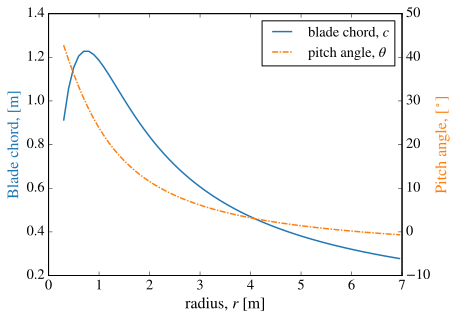

In [119]:
θ_vec = ϕ_vec - α
r_vec = λ_vec * V1a / Ω
c_vec = Zc_vec * Zc_factor

ax1 = mpl.gca()
ax1.plot( r_vec, c_vec, mut.linecolors[0], label="blade chord, $c$" )
ax1.set_ylabel( "Blade chord, [m]", color=mut.linecolors[0] )
ax1.set_xlabel( r"radius, $r$ [m]")
ax2 = mpl.gca().twinx()
ax2.plot( r_vec, np.array( θ_vec ) * rad2deg, mut.linecolors[1], \
          dashes=mut.linestyles[2], label=r'pitch angle, $\theta$' )
ax2.tick_params(axis='y' )
ax2.set_ylabel( "Pitch angle, [$^\circ$]", color=mut.linecolors[1] )

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right' )

mpl.savefig( "TurbineDesign.pdf" )

In [120]:
def tip_loss( a, ap, ϕ, λ, λtip ):
    ff = 0.5 * Z * ( λtip / λ - 1 ) * np.sqrt( 1 + ( λ / (1-a) )**2 )
    rr =  np.max( ( 2.0 / np.pi * np.arccos( np.exp( -ff ) ), 1E-3 ) )
    # rr = 1
    return rr

C_P = 2.8955


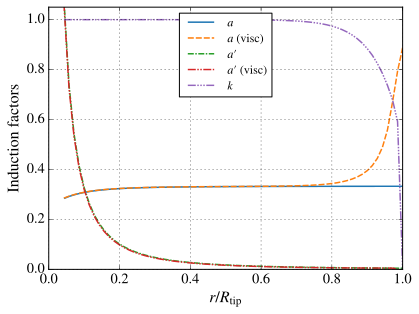

In [121]:
visc_a_vec = a_vec.copy()
visc_ap_vec = ap_vec.copy()
visc_ϕ_vec = ϕ_vec.copy()
visc_Zc_vec = Zc_vec.copy()
visc_θ_vec = θ_vec.copy()
visc_c_vec = c_vec.copy()
visc_CP_vec = CP_vec.copy()
visc_k_vec = np.zeros_like( visc_a_vec )
visc_CP = 0.0

ω = 0.7
omω = 1 - ω

for i, λ in enumerate( λ_vec ):

    for k in range( 5 ):
        ϕ = visc_ϕ_vec[i]
        cosϕ = np.cos( ϕ )
        sinϕ = np.sin( ϕ )

        a = visc_a_vec[i]
        ap = visc_ap_vec[i]
        k = tip_loss( a, ap, ϕ, λ, λ_vec[-1] )
        # print( f'{k:.4E}', end=' ' )

        σ = Z * visc_c_vec[i] / ( 2 * np.pi * r_vec[i] )
        Ca = CL * cosϕ + CD * sinϕ
        Ct = CL * sinϕ - CD * cosϕ

        a  = σ * Ca / ( 4 * k * sinϕ**2 + σ * Ca )
        ap = σ * Ct / ( 4 * k * sinϕ*cosϕ - σ * Ct )
        ϕ = np.arctan2( ( 1 - a ), ( 1 + ap )* λ )

        visc_a_vec[i] = visc_a_vec[i] * ω + a * omω
        visc_ap_vec[i] = visc_ap_vec[i] * ω + ap * omω
        visc_ϕ_vec[i] = ϕ
        visc_k_vec[i] = k
        # Zc_vec[i] = Zc

        if i > 0:
            CP_vec[i] = CP = CP + Integral_f( 1 - 3*a_vec[i], 1 - 3*a_vec[i-1], λ_tip )
        else:
            CP = 0.0
    # print()
    # print( i, a_vec[i], visc_a_vec[i], ap_vec[i], visc_ap_vec[i] )

x_vec = λ_vec / λ_tip

mpl.plot( x_vec, a_vec,  label = r"$a$" )
mpl.plot( x_vec, visc_a_vec,  label = r"$a$ (visc)" )
mpl.plot( x_vec, ap_vec, label = r"$a\prime$" )
mpl.plot( x_vec, visc_ap_vec, label = r"$a\prime$ (visc)" )
# mpl.plot( x_vec, Zc_vec, label = r"$\dfrac{Zc\,\Omega C_L}{2\pi V_{1a}}$" )
# mpl.plot( x_vec, CP_vec, label = r"$C_P$" )
mpl.plot( x_vec, visc_k_vec, label = r"$k$" )

mpl.xlabel( r"$r/R_\mathrm{tip}$")
mpl.ylabel( "Induction factors")
mpl.legend( loc="upper center", fontsize=12, handlelength=2.8, \
            labelspacing=0.4 )
mpl.grid()
mpl.ylim( ( 0.0, 1.05 ) )
mpl.savefig( "InductionFactors.pdf" )
print( f"C_P = {CP_vec[-1]:.4f}" )

In [122]:
df = pd.DataFrame( { r"$\lambda$": λ_vec,
                     r"$a$": visc_a_vec,
                     r"$a'$": visc_ap_vec,
                     r"$\phi$": visc_ϕ_vec*rad2deg,
                    #  r"$C_P$": CP_vec,
                     r"$\frac{Zc\,\Omega C_L}{2\pi V_{1a}}$": Zc_vec
                    } )

# print( df.to_latex(index=False,
#        formatters=["{:.2f}".format,"{:.5f}".format,"{:.5f}".format, \
#                    "{:.2f}".format,"{:.3f}".format,"{:.4f}".format]
# ))
df

,$\lambda$,$a$,$a'$,$\phi$,"$\frac{Zc\,\Omega C_L}{2\pi V_{1a}}$"
0,0.3,0.285370,1.065901,49.103458,0.410632
1,0.4,0.293036,0.728245,45.678761,0.477863
2,0.5,0.299360,0.532185,42.481205,0.520502
3,0.6,0.304560,0.406405,39.528302,0.544310
4,0.7,0.308833,0.320319,36.823885,0.554210
...,...,...,...,...,...
63,6.6,0.488640,0.005190,3.730161,0.132543
64,6.7,0.558490,0.005180,2.703247,0.130626
65,6.8,0.669435,0.004941,1.165841,0.128763
66,6.9,0.793879,0.000138,0.047251,0.126952
